# 4.2 Fixing mistakes

*Estimated time to complete this notebook: 10 minutes*

We're still in our git working directory:

In [1]:
import os

top_dir = os.getcwd()
git_dir = os.path.join(top_dir, "learning_git")
working_dir = os.path.join(git_dir, "git_example")
os.chdir(working_dir)
working_dir

'/home/turingdev/research-software/rse-course/module04_version_control_with_git/learning_git/git_example'

## Referring to changes with HEAD and ~

The commit we want to revert to is the one before the latest.

`HEAD` refers to the latest commit.
That is, we want to go back to the change before the current `HEAD`.

We could use the hash code (e.g. 73fbeaf) to reference this, but you can also refer to the commit before the `HEAD` as `HEAD~`, the one before that as `HEAD~~`, the one before that as `HEAD~3`.

## Reverting

Ok, so now we'd like to undo the nasty commit with the lie about Mount Fictional.

In [2]:
%%bash
git revert HEAD~

Auto-merging test.md
[main c489aab] Revert "Add a lie about a mountain"
 Date: Mon Nov 8 14:00:29 2021 +0000
 1 file changed, 2 deletions(-)


An editor may pop up, with some default text which you can accept and save. 

## Conflicted reverts

You may, depending on the changes you've tried to make, get an error message here.

If this happens, it is because git could not automagically decide how to combine the change you made after the change you want to revert, with the attempt to revert the change: this could happen, for example, if they both touch the same line.

If that happens, you need to manually edit the file to fix the problem. Skip ahead to the section on resolving conflicts, or ask a demonstrator to help.

## Review of changes

The file should now contain the change to the title, but not the extra line with the lie. Note the log:

In [3]:
%%bash
git log --date=short

commit c489aababc4488d5556ef340257905ee18873125
Author: Turing Developer <developer@example.com>
Date:   2021-11-08

    Revert "Add a lie about a mountain"
    
    This reverts commit 6e8a302387007780675dbd5cb1823901d1a7b59b.

commit f79cacc17500651a228f9b5a1922c3b50ea723c3
Author: Turing Developer <developer@example.com>
Date:   2021-11-08

    Change title

commit 6e8a302387007780675dbd5cb1823901d1a7b59b
Author: Turing Developer <developer@example.com>
Date:   2021-11-08

    Add a lie about a mountain

commit 238eaff15e2769e0ef1d989f1a2e8be1873fa0ab
Author: Turing Developer <developer@example.com>
Date:   2021-11-08

    First commit of discourse on UK topography


## Antipatch

Notice how the mistake has stayed in the history.

There is a new commit which undoes the change: this is colloquially called an "antipatch".
This is nice: you have a record of the full story, including the mistake and its correction.

## Rewriting history

It is possible, in git, to remove the most recent change altogether, "rewriting history". Let's make another bad change, and see how to do this.

## A new lie

In [4]:
%%writefile test.md
Mountains and Hills in the UK
===================
Engerland is not very mountainous.
But has some tall hills, and maybe a
mountain or two depending on your definition.


Overwriting test.md


In [5]:
%%bash
cat test.md

Mountains and Hills in the UK
Engerland is not very mountainous.
But has some tall hills, and maybe a
mountain or two depending on your definition.


In [6]:
%%bash
git diff

diff --git a/test.md b/test.md
index dd5cf9c..4801c98 100644
--- a/test.md
+++ b/test.md
@@ -1,4 +1,5 @@
 Mountains and Hills in the UK
-England is not very mountainous.
-But has some tall hills, and maybe a mountain or two depending on your definition.
+Engerland is not very mountainous.
+But has some tall hills, and maybe a
+mountain or two depending on your definition.


In [7]:
%%bash
git commit -am "Add a silly spelling"

[main 13cfc78] Add a silly spelling
 1 file changed, 3 insertions(+), 2 deletions(-)


In [8]:
%%bash
git log --date=short

commit 13cfc78608055a7e681195e13e47bea96934e648
Author: Turing Developer <developer@example.com>
Date:   2021-11-08

    Add a silly spelling

commit c489aababc4488d5556ef340257905ee18873125
Author: Turing Developer <developer@example.com>
Date:   2021-11-08

    Revert "Add a lie about a mountain"
    
    This reverts commit 6e8a302387007780675dbd5cb1823901d1a7b59b.

commit f79cacc17500651a228f9b5a1922c3b50ea723c3
Author: Turing Developer <developer@example.com>
Date:   2021-11-08

    Change title

commit 6e8a302387007780675dbd5cb1823901d1a7b59b
Author: Turing Developer <developer@example.com>
Date:   2021-11-08

    Add a lie about a mountain

commit 238eaff15e2769e0ef1d989f1a2e8be1873fa0ab
Author: Turing Developer <developer@example.com>
Date:   2021-11-08

    First commit of discourse on UK topography


## Using reset to rewrite history

In [9]:
%%bash
git reset HEAD~

Unstaged changes after reset:
M	test.md


In [10]:
%%bash
git log --date=short

commit c489aababc4488d5556ef340257905ee18873125
Author: Turing Developer <developer@example.com>
Date:   2021-11-08

    Revert "Add a lie about a mountain"
    
    This reverts commit 6e8a302387007780675dbd5cb1823901d1a7b59b.

commit f79cacc17500651a228f9b5a1922c3b50ea723c3
Author: Turing Developer <developer@example.com>
Date:   2021-11-08

    Change title

commit 6e8a302387007780675dbd5cb1823901d1a7b59b
Author: Turing Developer <developer@example.com>
Date:   2021-11-08

    Add a lie about a mountain

commit 238eaff15e2769e0ef1d989f1a2e8be1873fa0ab
Author: Turing Developer <developer@example.com>
Date:   2021-11-08

    First commit of discourse on UK topography


## Covering your tracks

The silly spelling *is no longer in the log*. This approach to fixing mistakes, "rewriting history" with `reset`, instead of adding an antipatch with `revert`, is dangerous, and we don't recommend it. But you may want to do it for small silly mistakes, such as to correct a commit message.

## Resetting the working area

When `git reset` removes commits, it leaves your working directory unchanged -- so you can keep the work in the bad change if you want. 

In [11]:
%%bash
cat test.md

Mountains and Hills in the UK
Engerland is not very mountainous.
But has some tall hills, and maybe a
mountain or two depending on your definition.


If you want to lose the change from the working directory as well, you can do `git reset --hard`.

I'm going to get rid of the silly spelling, and I didn't do `--hard`, so I'll reset the file from the working directory to be the same as in the index:

In [12]:
%%bash
git checkout test.md

Updated 1 path from the index


In [13]:
%%bash
cat test.md

Mountains and Hills in the UK
England is not very mountainous.
But has some tall hills, and maybe a mountain or two depending on your definition.


We can add this to our diagram:

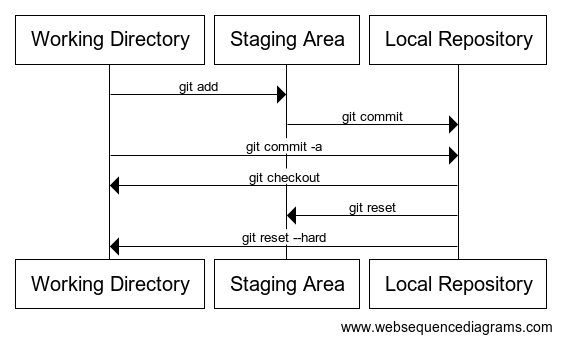

In [14]:
message = """
Working Directory -> Staging Area : git add
Staging Area -> Local Repository : git commit
Working Directory -> Local Repository : git commit -a
Local Repository -> Working Directory : git checkout
Local Repository -> Staging Area : git reset
Local Repository -> Working Directory: git reset --hard
"""
from wsd import wsd

%matplotlib inline
wsd(message)

We can add it to Jim's story:

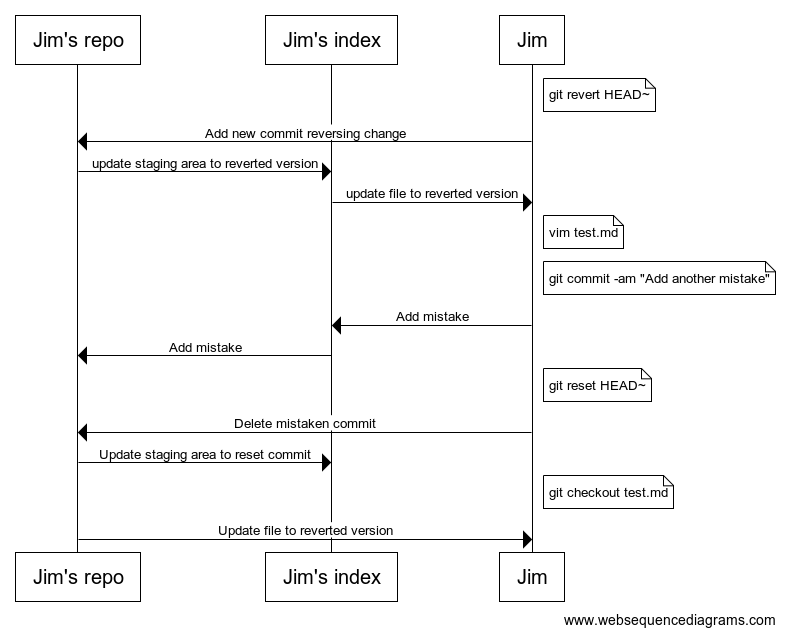

In [15]:
message = """
participant "Jim's repo" as R
participant "Jim's index" as I
participant Jim as J

note right of J: git revert HEAD~

J->R: Add new commit reversing change
R->I: update staging area to reverted version
I->J: update file to reverted version



note right of J: vim test.md
note right of J: git commit -am "Add another mistake"
J->I: Add mistake
I->R: Add mistake

note right of J: git reset HEAD~

J->R: Delete mistaken commit
R->I: Update staging area to reset commit

note right of J: git checkout test.md

R->J: Update file to reverted version
"""
wsd(message)